This project uses the Smartphones Sales Dataset in India from Kaggle.

The project will highlight the most important data manipulation, and plotting techniques. From my own initiative, I added one way to predict the sales prices using a simple linear regression technique.

About the dataset.

Description for each of the variables:

Brands: The brands of smartphones included in the dataset.

Colors: The colors available for the smartphones.

Memory: The storage capacity of the smartphones, typically measured in gigabytes (GB) or megabytes (MB).

Storage: The internal storage capacity of the smartphones, often measured in gigabytes (GB) or megabytes (MB).

Rating: The user ratings or scores assigned to the smartphones, reflecting user satisfaction or performance.

Selling Price: The price at which the smartphones are sold to consumers.

Original Price: The original or list price of the smartphones before any discounts or promotions.

Mobile: Indicates whether the device is a mobile phone.

Discount: The discount applied to the original price to calculate the selling price.

Discount percentage: The percentage discount applied to the original price to calculate the selling price.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

%matplotlib inline

Loading the data.

In [2]:
data = pd.read_csv("Sales.csv")

In [3]:
data

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.4,16999,19999,POCO M4 Pro 5G,3000,15.000750
3110,Nokia,225,Black,NaN,Expandable Upto 32 GB,Yes,3.6,3499,3499,Nokia 225,0,0.000000
3111,Apple,iPhone SE,White,2 GB,128 GB,Yes,4.5,44900,44900,Apple iPhone SE,0,0.000000
3112,Apple,iPhone 13 Pro,Gold,6 GB,128 GB,Yes,NaN,119900,119900,Apple iPhone 13 Pro,0,0.000000


Cleaning the data. Describing the data. dropping dupplicates and renaming the columns.

In [5]:
data.describe()

,Rating,Selling Price,Original Price,Discount,discount percentage
count,2970.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,4.243098,26436.625562,28333.473025,1896.847463,6.086788
std,0.271991,30066.892622,31525.599889,5337.126176,11.106776
min,2.300000,1000.000000,1000.000000,-8000.000000,-160.320641
25%,4.100000,9990.000000,10030.250000,0.000000,0.000000
50%,4.300000,15000.000000,16889.500000,0.000000,0.000000
75%,4.400000,28999.000000,31500.000000,2000.000000,9.836388
max,5.000000,179900.000000,189999.000000,75000.000000,70.610305


In [7]:
dup_filter = data.duplicated()
data[dup_filter]

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
16,Apple,iPhone 13 Mini,Pink,6 GB,512 GB,Yes,NaN,99900,99900,Apple iPhone 13 Mini,0,0.000000
178,Apple,iPhone 11,White,4GB,256 GB,Yes,4.6,64900,64900,Apple iPhone 11,0,0.000000
338,Nokia,C01 Plus,Blue,2 GB,16 GB,Yes,NaN,6499,6499,Nokia C01 Plus,0,0.000000
765,SAMSUNG,Guru Music 2,Black,NaN,2 MB,Yes,4.3,1625,1625,SAMSUNG Guru Music 2,0,0.000000
775,Apple,iPhone 7,Gold,2 GB,32 GB,Yes,4.5,24999,31500,Apple iPhone 7,6501,20.638095
...,...,...,...,...,...,...,...,...,...,...,...,...
3041,Apple,iPhone SE,Red,2 GB,128 GB,Yes,4.5,44900,44900,Apple iPhone SE,0,0.000000
3052,Apple,iPhone 11,Purple,4GB,128 GB,Yes,4.6,54900,54900,Apple iPhone 11,0,0.000000
3071,Apple,iPhone 7,Red,2 GB,256 GB,Yes,4.7,74400,74400,Apple iPhone 7,0,0.000000
3110,Nokia,225,Black,NaN,Expandable Upto 32 GB,Yes,3.6,3499,3499,Nokia 225,0,0.000000


In [8]:
data = data.drop_duplicates()
data

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3107,SAMSUNG,Galaxy S Duos 2,Black,512 MB,4 GB,Yes,4.0,5999,5999,SAMSUNG Galaxy S Duos 2,0,0.000000
3108,SAMSUNG,Metro 313,Black,4 MB,2 MB,Yes,4.2,2299,2299,SAMSUNG Metro 313,0,0.000000
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.4,16999,19999,POCO M4 Pro 5G,3000,15.000750
3112,Apple,iPhone 13 Pro,Gold,6 GB,128 GB,Yes,NaN,119900,119900,Apple iPhone 13 Pro,0,0.000000


In [9]:
data.rename(columns = {"Selling Price":"Selling_price", "Original Price":"Original_price", "discount percentage":"Discount_percentage"}, inplace = True)
data

C:\Users\o_aba\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling_price,Original_price,Mobile,Discount,Discount_percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3107,SAMSUNG,Galaxy S Duos 2,Black,512 MB,4 GB,Yes,4.0,5999,5999,SAMSUNG Galaxy S Duos 2,0,0.000000
3108,SAMSUNG,Metro 313,Black,4 MB,2 MB,Yes,4.2,2299,2299,SAMSUNG Metro 313,0,0.000000
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.4,16999,19999,POCO M4 Pro 5G,3000,15.000750
3112,Apple,iPhone 13 Pro,Gold,6 GB,128 GB,Yes,NaN,119900,119900,Apple iPhone 13 Pro,0,0.000000


Single variable plot.

Text(0, 0.5, 'Frequency')

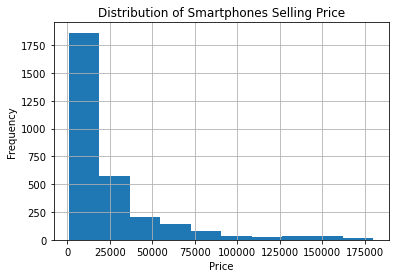

In [10]:
data["Selling_price"].hist()
plt.title("Distribution of Smartphones Selling Price")
plt.xlabel("Price")
plt.ylabel("Frequency")

In [11]:
brands_count = data["Brands"].value_counts()

Text(0, 0.5, '# of sales')

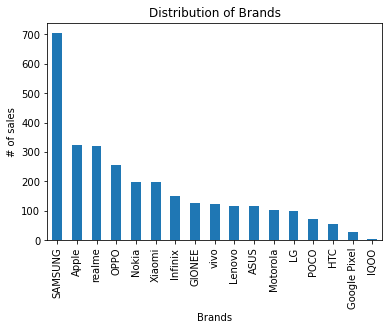

In [13]:
brands_count.plot(kind = "bar")
plt.title("Distribution of Brands")
plt.xlabel("Brands")
plt.ylabel("# of sales")

Text(0, 0.5, 'Frequency')

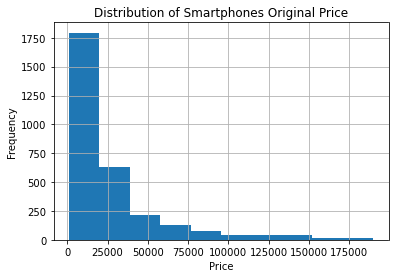

In [14]:
data["Original_price"].hist()
plt.title("Distribution of Smartphones Original Price")
plt.xlabel("Price")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

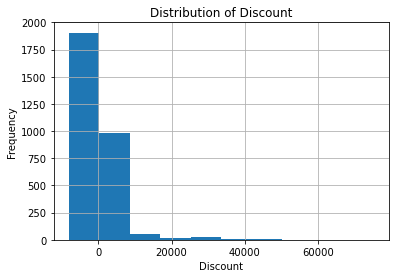

In [19]:
data["Discount"].hist()
plt.title("Distribution of Discount")
plt.xlabel("Discount")
plt.ylabel("Frequency")

Using pairplot to see relationships of the data.

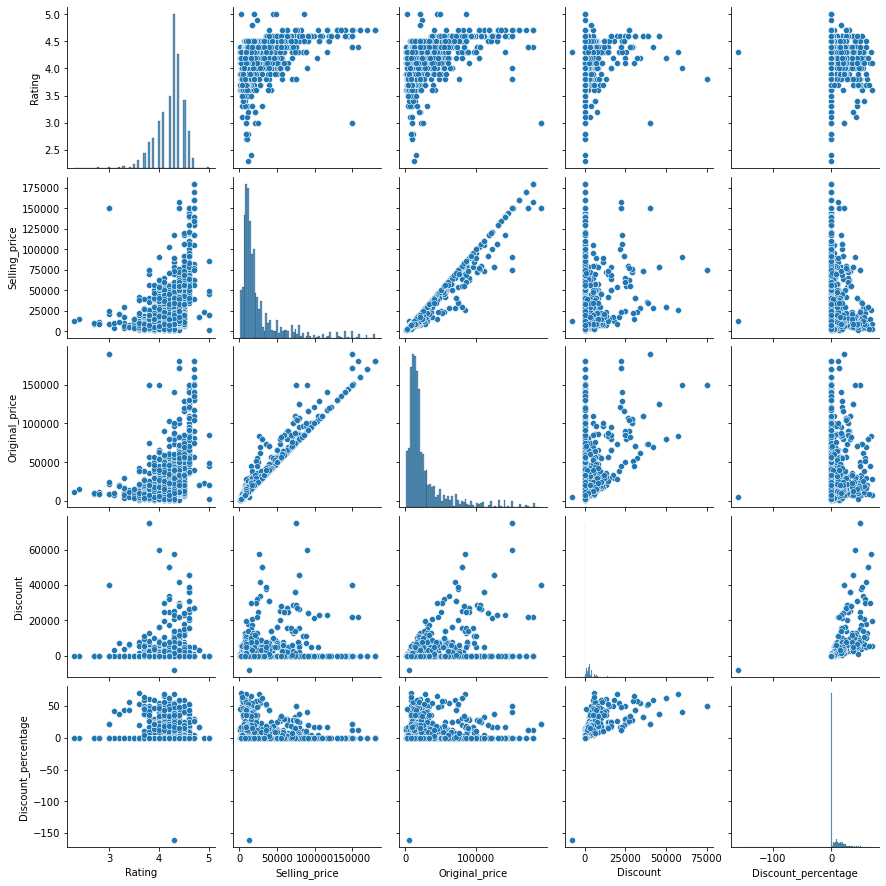

In [24]:
sns.pairplot(data = data)

Text(0, 0.5, 'Original Price')

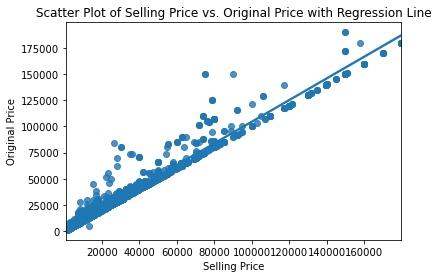

In [26]:
sns.regplot(data=data, x="Selling_price", y="Original_price", scatter=True)
plt.title("Scatter Plot of Selling Price vs. Original Price with Regression Line")
plt.xlabel("Selling Price")
plt.ylabel("Original Price")

Predicting the data

In [27]:
lm = smf.ols(formula = 'Selling_price ~ Original_price', data = data).fit()

In [28]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_price   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 1.034e+05
Date:                Wed, 06 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:43:06   Log-Likelihood:                -29857.
No. Observations:                3006   AIC:                         5.972e+04
Df Residuals:                    3004   BIC:                         5.973e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -205.0205    121.748     -1.684      0.092    -443.739      33.698
Original_price     0.9396      0.003    321.594      0.000       0.934       0.945
==============================================================================
Omnibus:                     3111.640   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           246871.687
Skew:                          -5.020   Prob(JB):                         0.00
Kurtosis:                      46.246   Cond. No.                     5.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
res = lm.resid
res

0       -195.133423
1        821.286091
2       -311.646971
3        990.473624
4       3220.184044
           ...     
3107     567.504791
3108     343.935550
3109   -1586.557542
3112    7449.872383
3113     682.371041
Length: 3006, dtype: float64

<AxesSubplot:>

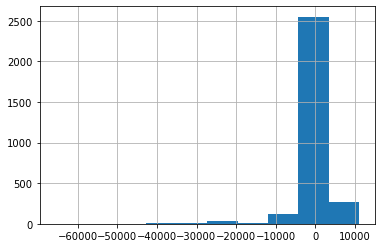

In [30]:
res.hist(bins = 10)

In [ ]:
This linear regression is a very good fit. the R-squared is closed to 1.